In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.ar_model import AutoReg

import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TimeSeriesAnalysis/ts_temp_data.csv')

In [9]:
data.shape

(3652, 2)

In [10]:
data.head()

,Date,Temp
0,01/01/81,20.7
1,02/01/81,17.9
2,03/01/81,18.8
3,04/01/81,14.6
4,05/01/81,15.8


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    3651 non-null   object
 1   Temp    3651 non-null   object
dtypes: object(2)
memory usage: 57.2+ KB


In [12]:
# again importing the dataset with date as datetime datatype
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TimeSeriesAnalysis/ts_temp_data.csv', index_col = 0, parse_dates = True)

In [13]:
df.head()

,Temp
Date,
01/01/81,20.7
02/01/81,17.9
03/01/81,18.8
04/01/81,14.6
05/01/81,15.8


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3652 entries, 01/01/81 to Daily minimum temperatures in Melbourne
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Temp    3651 non-null   object
dtypes: object(1)
memory usage: 186.1+ KB


In [15]:
df.describe()

,Temp
count,3651
unique,231
top,11
freq,51


In [16]:
df['Temp'].unique()

array(['20.7', '17.9', '18.8', '14.6', '15.8', '17.4', '21.8', '20',
       '16.2', '13.3', '16.7', '21.5', '25', '20.6', '24.8', '17.7',
       '15.5', '18.2', '12.1', '14.4', '16', '16.5', '18.7', '19.4',
       '17.2', '15.1', '15.4', '15.3', '21.9', '19.9', '16.6', '16.8',
       '17.1', '15', '13.7', '13.9', '18.3', '22', '22.1', '21.2', '18.4',
       '16.1', '15.7', '18.5', '16.9', '17.5', '17.8', '18.6', '17',
       '14.3', '11.4', '16.3', '11.8', '12.2', '14.7', '11.3', '10.6',
       '11.7', '14.2', '11.2', '8.1', '8', '8.8', '13.4', '10.9', '11',
       '14.5', '18.1', '10', '14.9', '15.9', '13', '7.6', '11.5', '13.5',
       '12.4', '13.2', '13.8', '9', '9.8', '8.9', '7.4', '9.9', '9.3',
       '8.6', '11.9', '14', '12', '10.5', '10.7', '10.1', '5.3', '6.6',
       '8.5', '5.9', '3.2', '2.1', '3.4', '5.4', '9.6', '12.3', '12.6',
       '12.8', '11.6', '5.7', '7.1', '2.5', '3.5', '4.6', '7.7', '10.4',
       '9.2', '6.1', '2.7', '4.3', '6.3', '3.8', '4.4', '4.8', '5.8',
   

In [17]:
df[df['Temp'] == 'Australia'].value_counts()

,count
Temp,
Australia,1


In [19]:
df['Temp'].isnull().sum()

np.int64(1)

In [20]:
# conversion to numeric
df['Temp'] = pd.to_numeric(df['Temp'],errors = 'coerce')

df = df.dropna(subset = ['Temp'])

In [21]:
df['Temp'].isnull().sum()

np.int64(0)

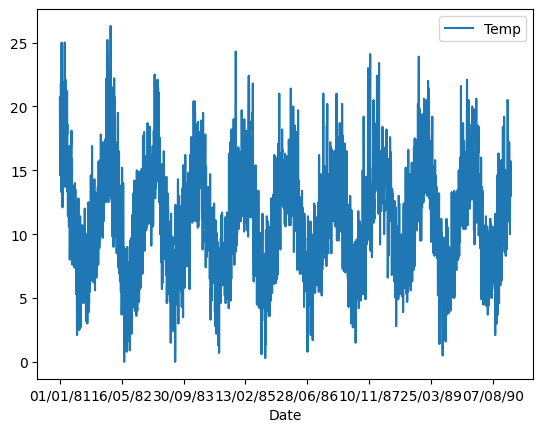

In [24]:
# independent variable
x = df.values

# plotting the data to check stationary
df.plot()
plt.show()

In [26]:
# dickey fuller test to check the stationary of data
from statsmodels.tsa.stattools import adfuller
dftst = adfuller(df['Temp'],autolag = 'AIC') #Akaike information criterion

print('ADF:',dftst[0])
print('p-value: ',dftst[1])
print('No.of lags: ',dftst[2])
print('Iterations: ',dftst[3])
print('Critical value: ')
for i,j in dftst[4].items():
  print('\t',i,':',j)

ADF: -4.444652847181708
p-value:  0.00024723724658534517
No.of lags:  20
Iterations:  3626
Critical value: 
	 1% : -3.432154725699155
	 5% : -2.8623374271161723
	 10% : -2.567194482813802


In [ ]:
# P value - 0.0002 is very small (<0.05) and it strongly suggest that the data is stationary

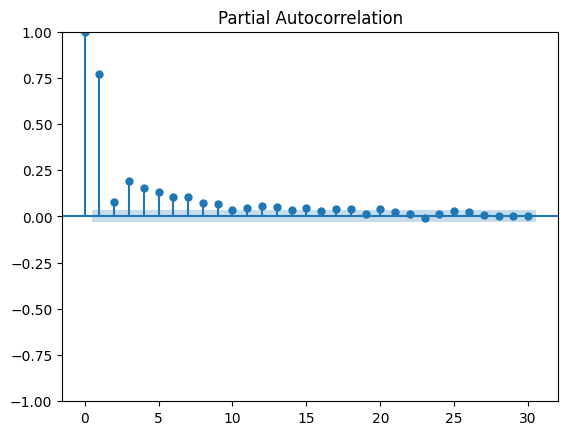

In [27]:
# PACF plot-  AR MODEL
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(df['Temp'],lags = 30)

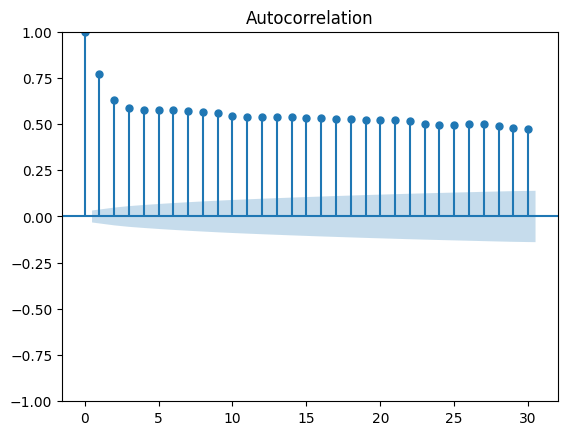

In [28]:
# ACF PLOT - MA MODEL
from statsmodels.graphics.tsaplots import plot_acf
acf = plot_acf(df['Temp'],lags = 30)

In [33]:
# data split
train = x[:len(x)-14]
test = x[len(x)-14:]

In [30]:
model = AutoReg(train,lags = 10).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3633
Model:                    AutoReg(10)   Log Likelihood               -8351.389
Method:               Conditional MLE   S.D. of innovations              2.426
Date:                Sun, 29 Jun 2025   AIC                          16726.778
Time:                        07:14:01   BIC                          16801.118
Sample:                            10   HQIC                         16753.262
                                 3633                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9382      0.142      6.599      0.000       0.660       1.217
y.L1           0.6089      0.017     36.678      0.000       0.576       0.641
y.L2          -0.0853      0.019     -4.391      0.0

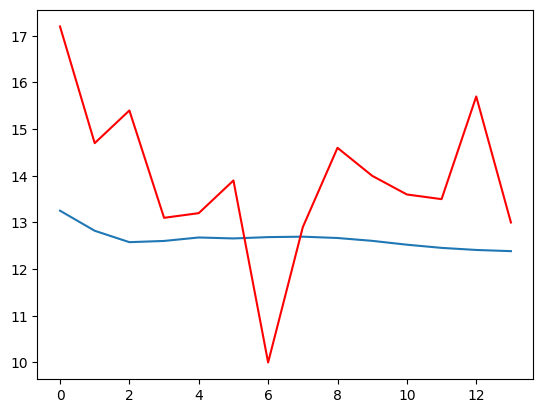

In [34]:
pred = model.predict(start = len(train),end = len(x)-1,dynamic = False)

plt.plot(pred)
plt.plot(test,color = 'red')
plt.show()